### Exercise 1a)

In this section, we analyze the analytical solutions to OLS regression. 

In [148]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from utils import MSE_and_R2, opt_theta, generate_dataset, runge

In [149]:
# Generate dataset
np.random.seed(124)
x, y = generate_dataset()

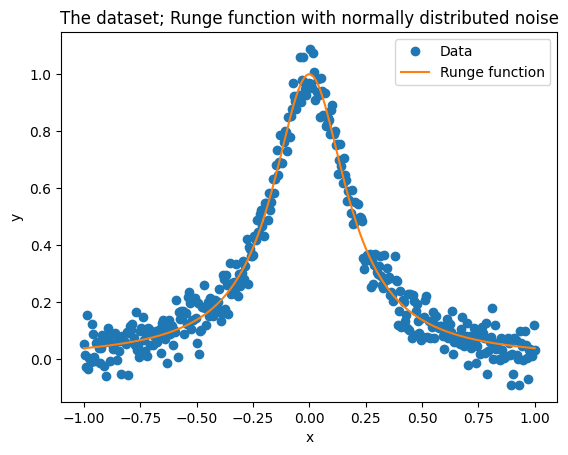

In [150]:
# Visalize the dataset

plt.plot(x,y,"o",label="Data")
plt.plot(x,runge(x),label="Runge function")
plt.title("The dataset; Runge function with normally distributed noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

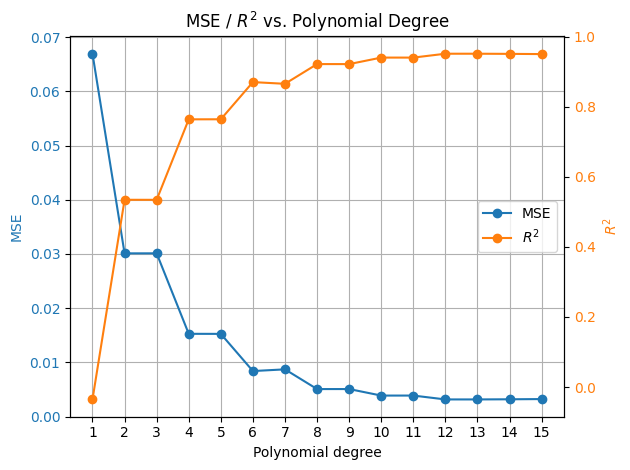

In [151]:
# Plot the MSE and R2 scores as a function of polynomial degrees, for OLS regression

polynomial_degrees = np.array(range(1, 16))

mse_values,r2_values = MSE_and_R2(x,y,polynomial_degrees)

# Shared plot, different axis
fig, ax1 = plt.subplots()
ax1.set_xlabel('Polynomial degree')
ax1.set_title('MSE / $R^2$ vs. Polynomial Degree')
ax1.set_xticks(polynomial_degrees)
ax1.grid()

# MSE line
color1 = "C0"
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylabel('MSE', color=color1)
mse_line, = ax1.plot(polynomial_degrees, mse_values, marker='o', color=color1, label="MSE")

# R2 line
ax2 = ax1.twinx()
color2 = "C1"
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel('$R^2$', color=color2)
r2_line, = ax2.plot(polynomial_degrees, r2_values, marker='o', color=color2, label="$R^2$")

# Legend
lines = [mse_line, r2_line]
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='center right')

plt.tight_layout()
plt.show()

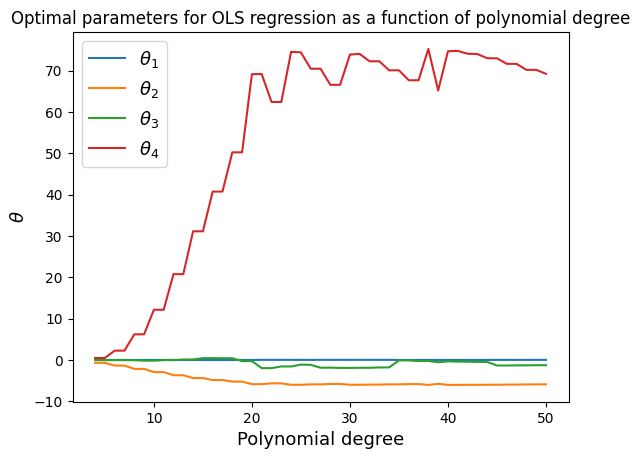

In [152]:
# Calculate and plot optimal OLS parameters as a function of polynomial degree

polynomial_degrees = np.array(range(4, 51))
opt_theta_vals = np.zeros((len(polynomial_degrees),polynomial_degrees[0]))

for i in range(len(polynomial_degrees)): 
    X = PolynomialFeatures(polynomial_degrees[i], include_bias=False).fit_transform(x.reshape(-1, 1))
    theta,_ = opt_theta(X,y)
    opt_theta_vals[i,:] = theta[:polynomial_degrees[0]]

for i in range(opt_theta_vals.shape[1]): 
    plt.plot(polynomial_degrees,opt_theta_vals[:,i],label=fr"$\theta_{i+1}$")

plt.xlabel("Polynomial degree",fontsize = 13)
plt.ylabel(r"$\theta$",fontsize = 13)
plt.legend(fontsize = 13)
plt.title("Optimal parameters for OLS regression as a function of polynomial degree")
plt.show()




In the figure below, we plot the mean squared error (MSE) as a function of the number of datapoints for different polynomial degrees in OLS regression. This is the plot we refer to at the beginning of section III in the report. 

We see that for large enough numbers of datapoints, the MSE eventually begins to converge, after experiencing large fluctuations for small numbers of datapoints. From the plot, it appears that we get close to convergence for the lowest polynomial degree (5) after roughly $3000$ datapoints. However, in order to ensure small runtimes for the programs, we wished to use smaller numbers of datapoints. From the plots of the higher polynomial degrees (10, 15 and 20), it appears that the largest fluctuations have already damped after a few hundred datapoints. That is the motivation to settle with $400$ datapoints. 

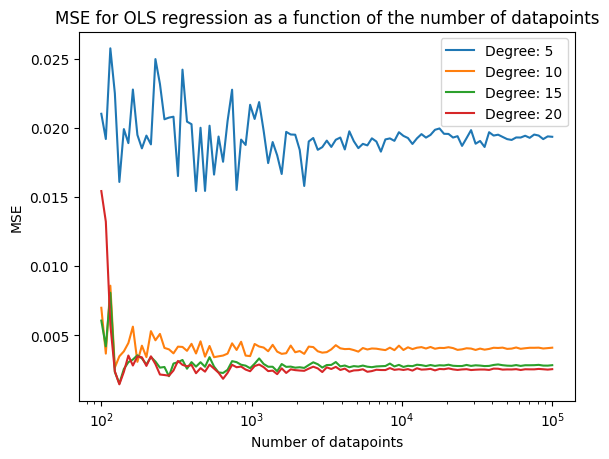

In [153]:
# Calculate and plot MSE as a function of the number of datapoints, for different polynomial degrees in OLS regression.

polynomial_degrees = np.array([5,10,15,20])
datapoints = 10**(np.linspace(2,5,101))
mse_vals = np.zeros((len(datapoints),len(polynomial_degrees)))

for i in range(len(datapoints)): 
    n = int(datapoints[i])
    x_n, y_n = generate_dataset(int(datapoints[i]))
    mse,_ = MSE_and_R2(x_n,y_n,polynomial_degrees)
    mse_vals[i,:] = mse

for i in range(len(polynomial_degrees)): 
    plt.plot(datapoints,mse_vals[:,i],label=f"Degree: {polynomial_degrees[i]}")

plt.xscale("log")
plt.xlabel("Number of datapoints")
plt.ylabel("MSE")
plt.title("MSE for OLS regression as a function of the number of datapoints")
plt.legend()
plt.show()

### Exercise 1b) 

We now attempt the Ridge regression model. We use different values of $\lambda$, and plot the MSE and $R^2$ as a function of polynomial degree. 

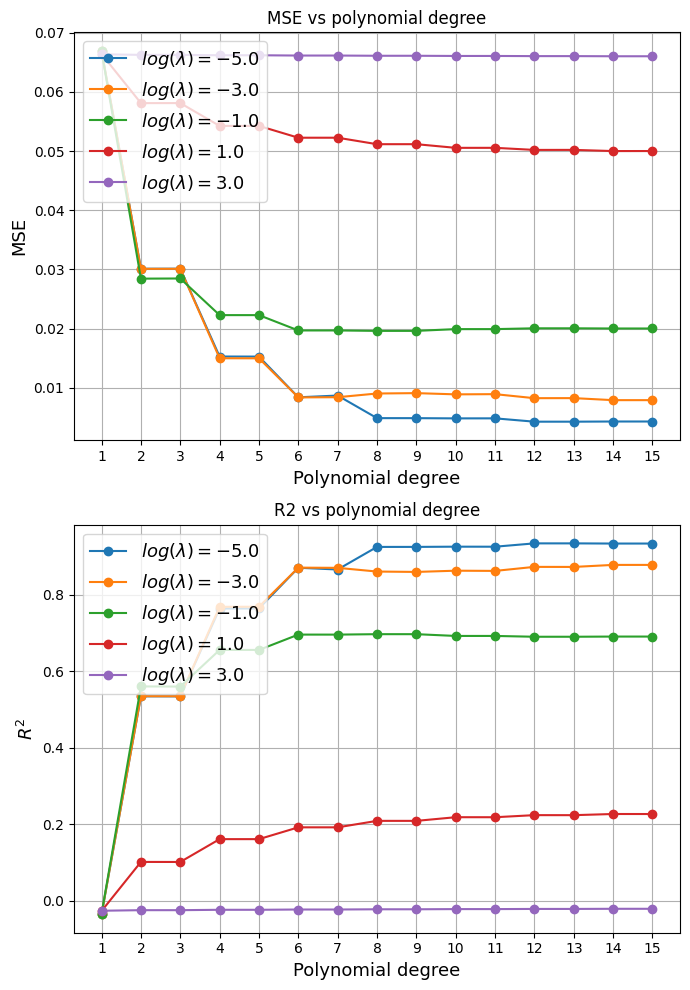

In [154]:
# Plot MSE as a function of polynomial degree, for lambda between 10^(-5) and 10^3 (Ridge regression)

lamb = 10**(np.linspace(-5,3,5))

polynomial_degrees = np.array(range(1, 16))

plt.figure(figsize=(7,10))

for i in range(len(lamb)): 
    mse_values,r2_values = MSE_and_R2(x,y,polynomial_degrees,regression_type="Ridge",lamb = lamb[i])
    plt.subplot(2, 1, 1)
    plt.plot(polynomial_degrees, mse_values, marker='o',label=fr"$log(\lambda) = {np.log10(lamb[i])}$")
    
    plt.subplot(2, 1, 2)
    plt.plot(polynomial_degrees, r2_values, marker='o',label=fr"$log(\lambda) = {np.log10(lamb[i])}$")

    
plt.subplot(2, 1, 1)
plt.title('MSE vs polynomial degree')
plt.xlabel('Polynomial degree',fontsize = 13)
plt.ylabel('MSE',fontsize = 13)
plt.legend(loc = "upper left",fontsize = 13)
plt.xticks(polynomial_degrees)
plt.grid()

plt.subplot(2, 1, 2)
plt.title('R2 vs polynomial degree')
plt.xlabel('Polynomial degree',fontsize = 13)
plt.ylabel(r'$R^2$',fontsize = 13)
plt.legend(loc = "upper left",fontsize = 13)
plt.xticks(polynomial_degrees)
plt.grid()

plt.tight_layout()
plt.show()

The next plot is not included in the report, but we keep it here as a record of our previous work. Here, we plot the MSE and $R^2$ as a function of $\lambda$ for several polynomial degrees. One can see from the plot that the MSE converges for both a very high and very low value of $\lambda$. For very low values of $\lambda$, we expect that the MSE approaches that of OLS regression. For very high $\lambda$, we may expect the reason for the convergence is that all the optimal parameters approach 0. 

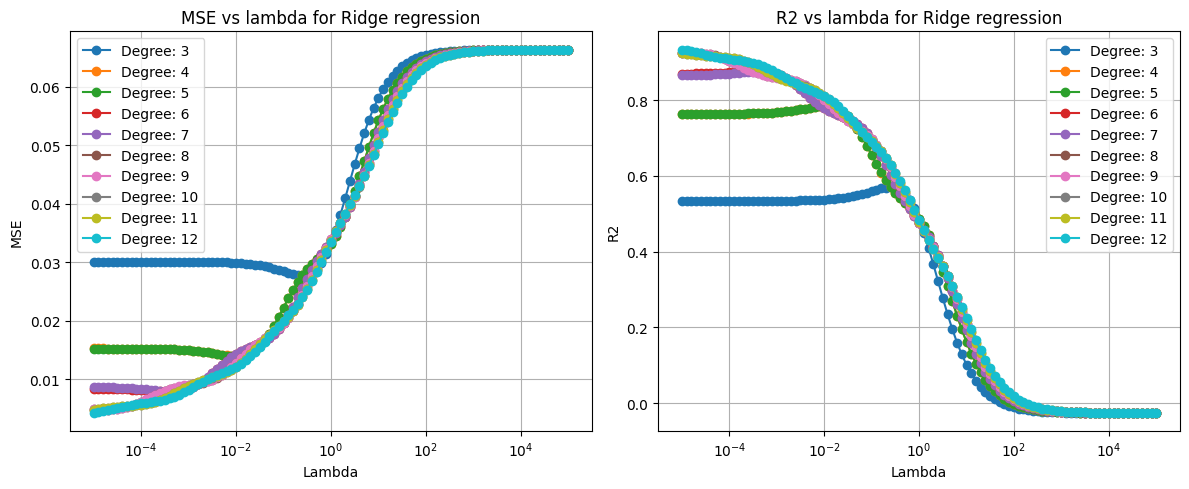

In [155]:
# Plot MSE and R2 as a function of lambda for different polynomial degrees (Ridge regression)

lamb = 10**(np.linspace(-5,5,101))

polynomial_degrees = np.array((range(3, 12+1)))

mse_values = np.zeros((len(polynomial_degrees),len(lamb)))
r2_values = mse_values.copy()

for i in range(len(lamb)): 
    mse,r2 = MSE_and_R2(x,y,polynomial_degrees,regression_type="Ridge",lamb = lamb[i])
    mse_values[:,i] = mse
    r2_values[:,i] = r2

plt.figure(figsize=(12,5))

for j in range(len(polynomial_degrees)): 
    plt.subplot(1, 2, 1)
    plt.plot(lamb, mse_values[j,:], marker='o',label=f"Degree: {polynomial_degrees[j]}")

    plt.subplot(1, 2, 2)
    plt.plot(lamb, r2_values[j,:], marker='o',label=f"Degree: {polynomial_degrees[j]}")

plt.subplot(1, 2, 1)
plt.xscale('log')
plt.title('MSE vs lambda for Ridge regression')
plt.xlabel('Lambda')
plt.legend()
plt.ylabel('MSE')
plt.grid()

plt.subplot(1, 2, 2)
plt.xscale('log')
plt.title('R2 vs lambda for Ridge regression')
plt.xlabel('Lambda')
plt.legend()
plt.ylabel('R2')
plt.grid()

plt.tight_layout()
plt.show()

In the next plot (also not included in the report), we see that, indeed, the optimal parameters approach 0 as $\lambda$ becomes very large. 

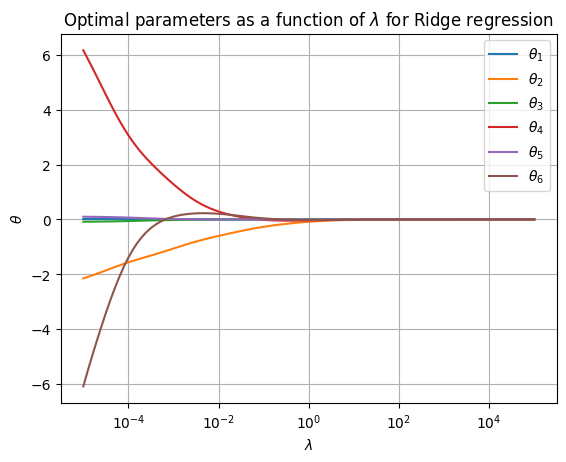

In [156]:
# Plot optimal parameters for Ridge regression as a function of lambda

lamb = 10**(np.linspace(-5,5,101))

theta_indices = np.array(range(1,7))

opt_theta_vals = np.zeros((len(lamb),len(theta_indices)))

X = PolynomialFeatures(15, include_bias=False).fit_transform(x.reshape(-1, 1))

for i in range(len(lamb)): 
    theta,_ = opt_theta(X,y,regression_type = "Ridge",lamb = lamb[i])
    opt_theta_vals[i,:] = theta[theta_indices - 1]

for j in range(len(theta_indices)): 
    plt.plot(lamb, opt_theta_vals[:,j], label=fr"$\theta_{theta_indices[j]}$")

plt.xscale("log")
plt.title('Optimal parameters as a function of $\\lambda$ for Ridge regression')
plt.xlabel("$\\lambda$")
plt.legend()
plt.ylabel("$\\theta$")
plt.grid()

plt.show()